Problem Statement:
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.
The main objective here is -
1. What people say about your product: what gives customers’ attitude towards the  product.
2. What people do: which reveals what people are doing rather than what they are  saying about your product.


## Columns Information

### People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of Kids in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

### Promotion

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place
NumDealsPurchases: Number of purchases made with a discount

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target
Need to perform clustering to summarize customer segments.


In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [176]:
df = pd.read_csv('marketing_campaign.csv', sep = ';')

In [177]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [178]:
df.shape

(2240, 29)

In [179]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Percentage of missing values

In [181]:
df.isnull().mean()*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

#### Observation:
- Only income feature has 1.071% missing value

## Check duplicate values

In [182]:
int(df.duplicated().sum())

0

#### Observations:
- No duplicate values

## Number of unique values

In [183]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

#### Observation:
- Z_Revenue and Z_CostContact has only one unique value.

## Drop columns

In [184]:
df.drop(['ID','Z_CostContact','Z_Revenue'],axis = 1,inplace=True)

## Univariate analysis

In [185]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


## Age

In [186]:
df['Age'] = datetime.now().year - df['Year_Birth']

In [187]:
df['Age'].describe()

count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

#### Observations:
- Minimum age of customer is 28 and maximum age is 131.
- Mean age of customer is 55.

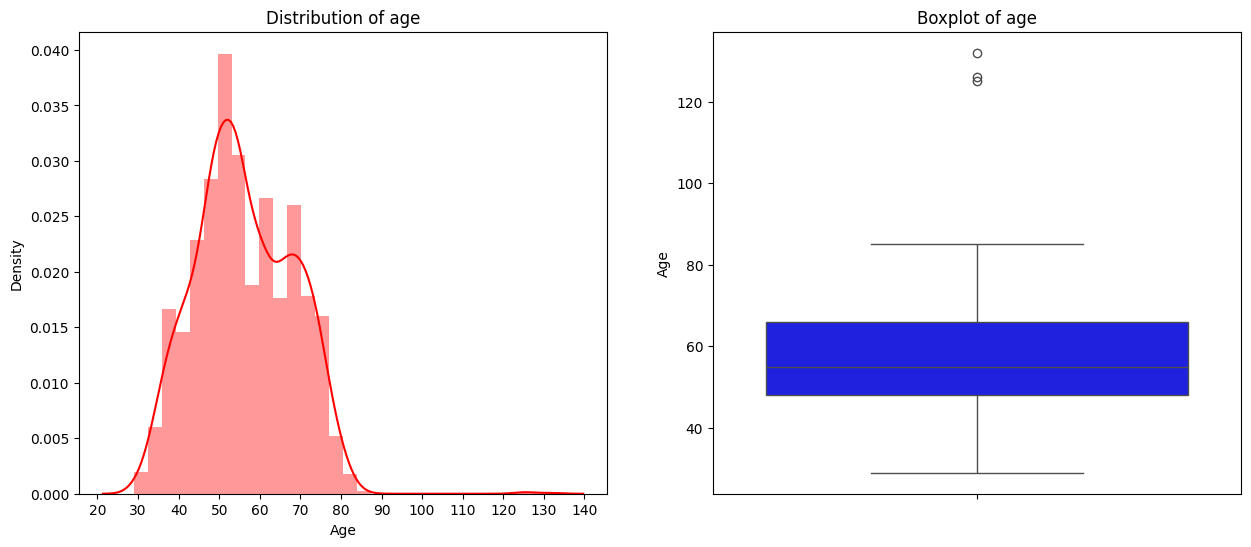

In [188]:
plt.figure(figsize=(15,6))

# histogarm of age feature
plt.subplot(1, 2, 1)
sns.distplot(df['Age'], color = 'red',bins = 30)
plt.locator_params(axis='x', nbins=15)
plt.title('Distribution of age')
plt.xlabel('Age')

# boxplot of age feature to check outliers
plt.subplot(1, 2, 2)
sns.boxplot(df['Age'], color = 'blue')
plt.title("Boxplot of age")
plt.show()

#### Observations:
- Customers are approximately between 30 and 85 year old.
- There are outliers in the age feature.
- A few customers are above the age of 90.

In [189]:
# Number of customers age is above 90

df[df['Age'] > 90]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,125
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,132
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,126


#### Observation:
- There are three customers whose ages are above 90.

In [190]:
# Define age groups
bins = [20, 40, 60, 80, 140]
labels = ['Adult', 'Middle age adult', 'Senior','Elderly']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Count of customers by age group
age_group_count = df['Age_group'].value_counts()

# pie plot of age group
px.pie(age_group_count, values = age_group_count.values, names = age_group_count.index, title = 'Distribution of age group',color = age_group_count.index,
       color_discrete_map={'Elderly':'lightcyan',
                          'Adult':'cyan',
                          'Senior':'royalblue',
                          'Middle age adult':'darkblue'})


#### Observations:
- 55% of the dataset consists of customers who are middle-aged adults (aged between 41 and 60).
- Seniors outnumber adults. 

## Education

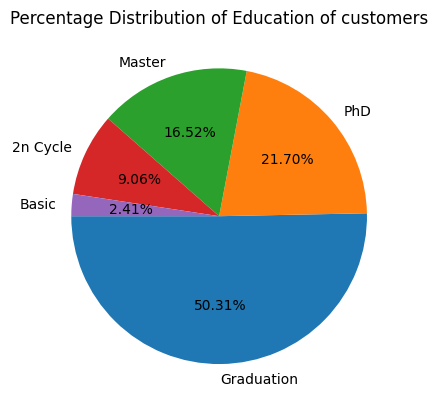

In [191]:
# Pie plot of Education
education_count = df['Education'].value_counts()
plt.pie(education_count.values, labels = education_count.index, autopct = '%1.2f%%', startangle=180)

# set title
plt.title("Percentage Distribution of Education of customers")
plt.show()

In [192]:
# Replace Basic and 2n Cycle with school
df['New_Education'] = df['Education'].replace(['Basic','2n Cycle'],'School')
df['New_Education'].unique()

array(['Graduation', 'PhD', 'Master', 'School'], dtype=object)

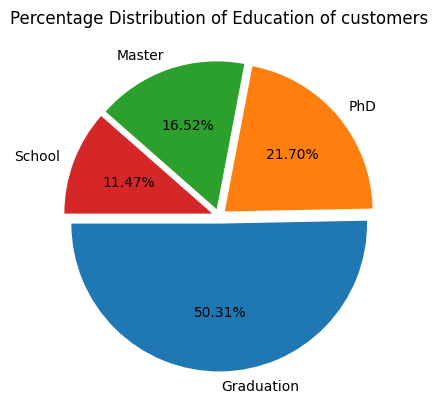

In [193]:
# Pie plot of Education
education_count = df['New_Education'].value_counts()
plt.pie(education_count.values, labels = education_count.index, autopct = '%1.2f%%',explode = [0.05]*4, startangle=180)

# set title
plt.title("Percentage Distribution of Education of customers")
plt.show()

#### Observations:
- 50% of the dataset consists of graduate customers.
- Customers with a PhD outnumber those with a school or master's education.

## Marital Status

In [194]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

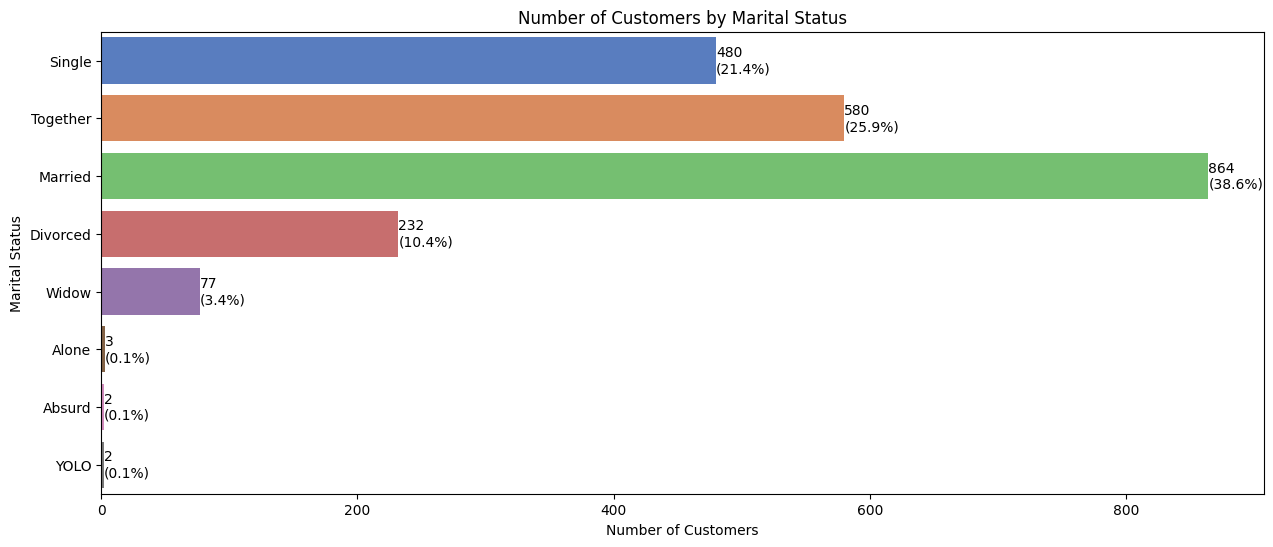

In [195]:
# Plot the countplot
plt.figure(figsize = (15, 6))
ax = sns.countplot(data=df, y='Marital_Status', palette='muted')

# Calculate total number of customers
total = len(df)

# Add counts and percentages above each bar
for p in ax.patches:
    count = int(p.get_width())  # Count of each category
    percentage = f'{100 * count / total:.1f}%'  # Percentage
    ax.annotate(f'{count}\n({percentage})',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va = 'center', fontsize=10)

# Set labels and title
plt.ylabel("Marital Status")
plt.xlabel("Number of Customers")
plt.title("Number of Customers by Marital Status")
plt.show()

#### Observations:
- Maximum customers are married and together. 

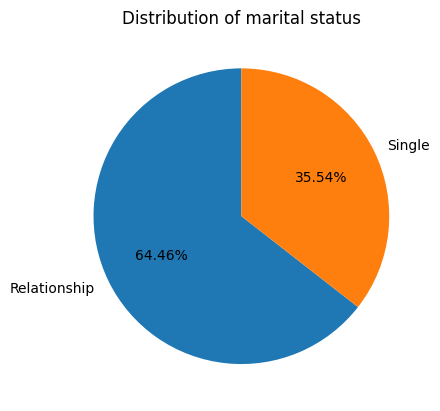

In [196]:
df['New_Marital_Status'] = df['Marital_Status'].replace({'Together':'Relationship', 'Married': 'Relationship','YOLO':"Single", 
                                                         'Absurd':'Single', 'Alone': 'Single', 'Widow':'Single', 'Divorced':'Single'})

# Pie plot of Married and singles
marital_status = df['New_Marital_Status'].value_counts()

plt.pie(marital_status.values, labels = marital_status.index, autopct = '%1.2f%%', startangle = 90)
plt.title('Distribution of marital status')
plt.show()

#### Observation:
- 64.46% of customers are married.
- 35.54% of customers are single.

## Income

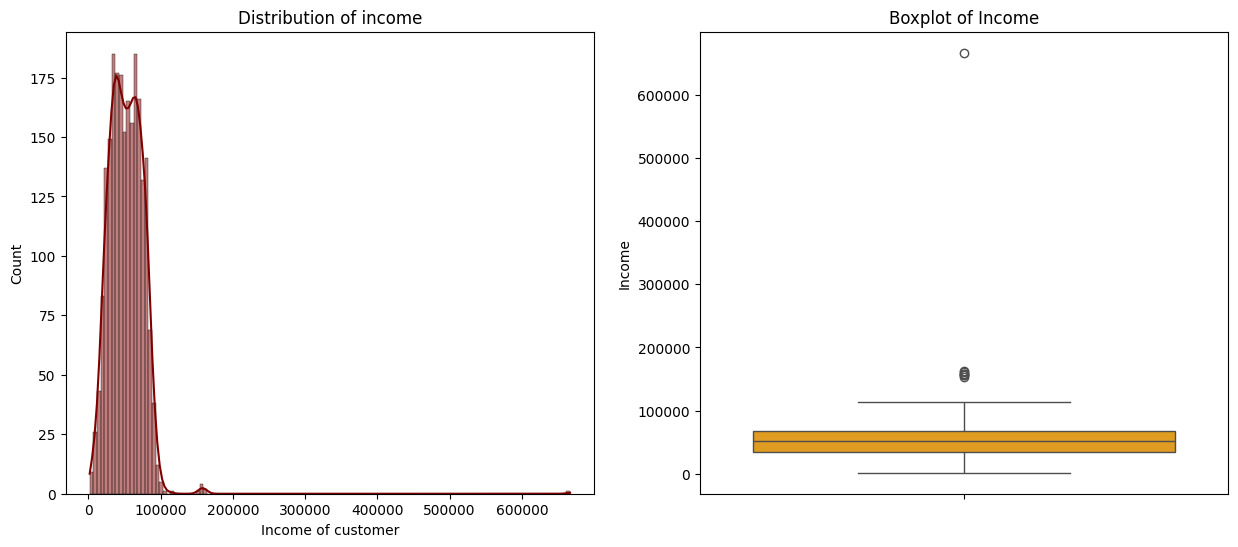

In [197]:
plt.figure(figsize = (15,6))

plt.subplot(1, 2, 1)
sns.histplot(df['Income'],color = 'maroon',kde = True)
plt.title("Distribution of income")
plt.xlabel("Income of customer")

plt.subplot(1, 2, 2)
sns.boxplot(df['Income'], color = 'Orange')
plt.title("Boxplot of Income")
plt.show()

#### Observation
- Most of the customer's incomes fall between 0 and 1,00,000.
- There are few customers have income above 1,00,000.

In [198]:
# Fill null values in income feature 
df['Income'] = df['Income'].fillna(df['Income'].median())

In [199]:
int(df['Income'].isna().sum())

0

In [200]:
# Cut income in groups
bins = [0, 2500, 100000, 700000]
labels = ['Low income', 'Medium income', 'High income']
df['Income_group'] = pd.cut(df['Income'], bins = bins, labels = labels, right = True)

# Count the customers by their income group
Income_group = df['Income_group'].value_counts().reset_index()
Income_group

,Income_group,count
0,Medium income,2225
1,High income,13
2,Low income,2


#### Observations:
- 2 customers have an income between 0 and 25,000.
- 13 customers have an income above 100,000.
- 2201 customers have an income between 25,000 and 100,000.

## Number of Kids

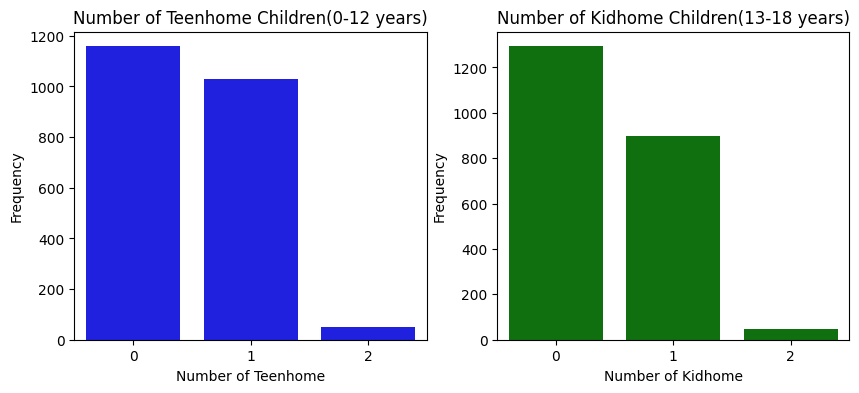

In [201]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Teenhome', data=df, color='blue')
plt.title("Number of Teenhome Children(0-12 years)")
plt.xlabel("Number of Teenhome")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.countplot(x='Kidhome', data=df, color='green')
plt.title("Number of Kidhome Children(13-18 years)")
plt.xlabel("Number of Kidhome")
plt.ylabel("Frequency")
plt.show()

In [202]:
df['Kids'] = df['Teenhome']+df['Kidhome']

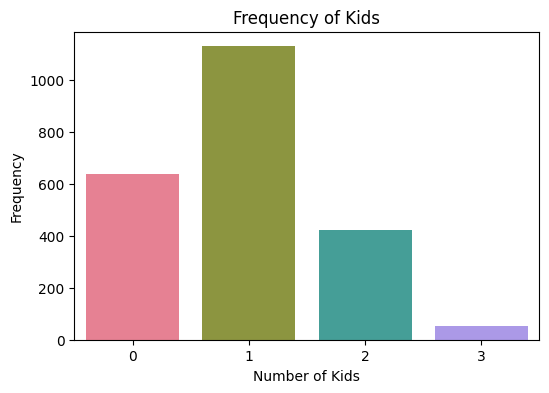

In [203]:
# Countplot of Kids
plt.figure(figsize = (6,4))
sns.countplot(x='Kids', data=df, palette='husl')
plt.title("Frequency of Kids")
plt.xlabel("Number of Kids")
plt.ylabel("Frequency")
plt.show()

## Observation:
- The majority of customers have one child.

## Dt_customer : date when a customer joined

In [204]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [205]:
d1 = max(df['Dt_Customer'])
df['Days_for'] = (d1 - df['Dt_Customer']).dt.days

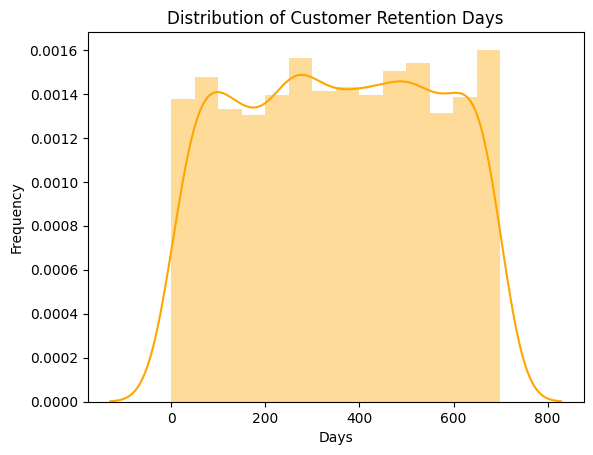

In [206]:
sns.distplot(df['Days_for'], color = 'orange')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title("Distribution of Customer Retention Days")
plt.show()

#### Observations:
- Most customers have stayed for 0 to 700 days.
- The distribution shows a consistent trend, with no major drop-offs or spikes in customer retention duration.

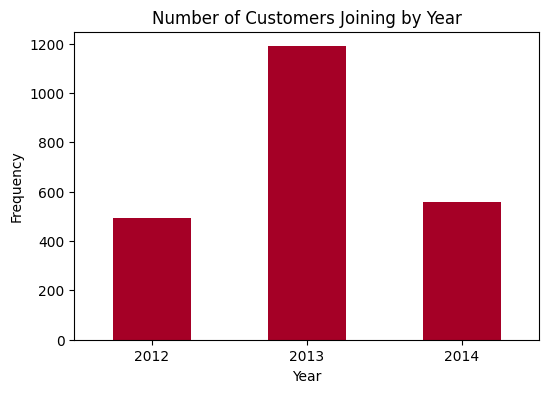

In [207]:
# Year of joining of customers
df['Year_of_joining'] = df['Dt_Customer'].dt.year

# Count of customers in each year
year_joining = df['Year_of_joining'].value_counts().sort_index()

# Barplot of joining year
plt.figure(figsize = (6,4))
year_joining.plot(kind = 'bar', cmap=plt.cm.RdYlBu)
plt.title("Number of Customers Joining by Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.show()

#### Observation:
- The maximum number of customers joined in the year 2013.

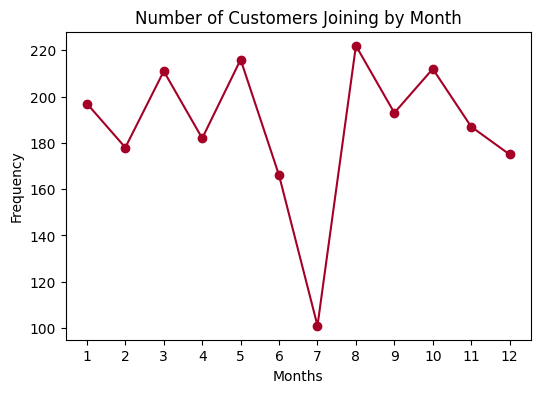

In [208]:
# Month of joining of customers
df['Month_of_joining'] = df['Dt_Customer'].dt.month

# Count of customers in each year
month_joining = df['Month_of_joining'].value_counts().sort_index()

# Barplot of joining year
plt.figure(figsize = (6,4))
month_joining.plot(kind = 'line', cmap=plt.cm.RdYlBu, marker = 'o')
plt.title("Number of Customers Joining by Month")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.xticks(ticks=range(1, 13))
plt.show()

#### Observations:
- In the 7th month, very few customers joined.
- Except for the 7th month, the trend remains almost the same.

## Recency

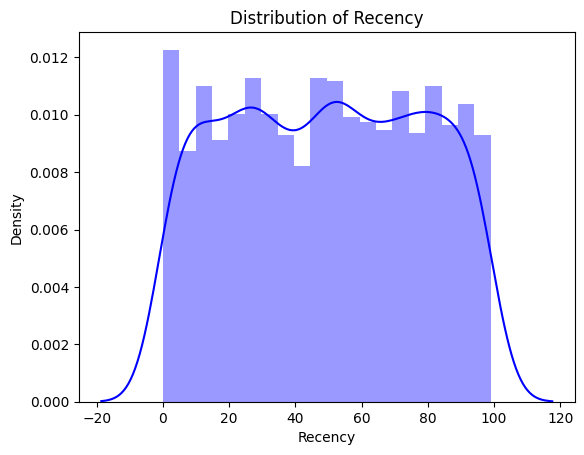

In [209]:
sns.distplot(df['Recency'],bins=20,color='blue')
plt.title("Distribution of Recency")
plt.show()

#### Observation:
- Customer purchases are spread relatively evenly across the range of days, with no particular peak or drop-off, indicating consistent purchase patterns over time.

## Complain

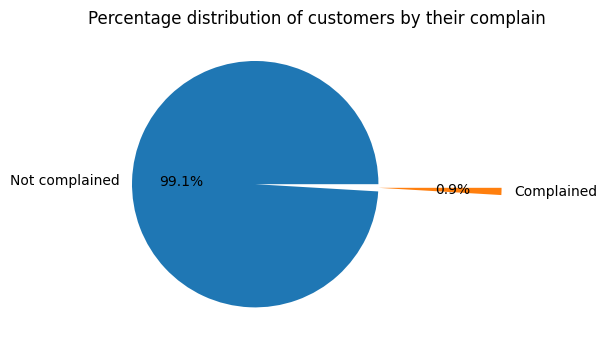

In [210]:
complian_counts=df['Complain'].value_counts()
plt.figure(figsize = (6,4))
plt.pie(complian_counts,labels=['Not complained', 'Complained'],autopct='%1.1f%%', explode = [0.5]*2)
plt.title("Percentage distribution of customers by their complain")
plt.show()

#### Observation:
- 0.9% of customers have complained.
- 99.1% customers have no complains.

## Total amount spent

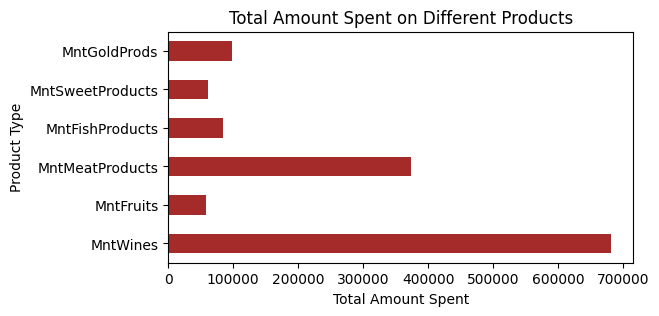

In [211]:
plt.figure(figsize = (6,3))
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().plot(kind = 'barh', color = 'brown')
plt.title("Total Amount Spent on Different Products")
plt.xlabel("Total Amount Spent")
plt.ylabel("Product Type")
plt.show()

#### Observation:
- The total amount spent on wines is the highest, followed by meat products as the second highest.
- The total amounts spent on gold, fish, sweet, and fruit products are relatively similar and lower than wines and meat products.
- Customers seem to focus more on purchasing essential products rather than non-essential or luxury items.

In [212]:
df['Total_amount_spent'] = df['MntFishProducts']+df['MntFruits']+df['MntGoldProds']+df['MntMeatProducts']+df['MntWines']+df['MntSweetProducts']

In [213]:
df['Total_amount_spent'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_amount_spent, dtype: float64

#### Observations:
- The minimum amount spent is 5, and the maximum amount spent is 2525.
- The mean total amount spent is 605.

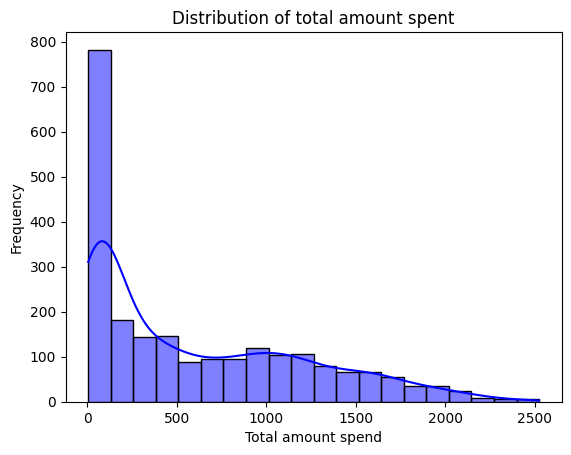

In [214]:
sns.histplot(df['Total_amount_spent'], color = 'Blue', bins = 20, kde = True)
plt.title("Distribution of total amount spent")
plt.xlabel("Total amount spend")
plt.ylabel("Frequency")
plt.show()

#### Observations:
- As the total amount spent increases, the number of customers decreases.

## Products accepted from the campaign

In [215]:
# Counting the occurrences of each value (0 and 1) for each campaign and the 'Response' column.
campaign_counts = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']].apply(pd.Series.value_counts).T

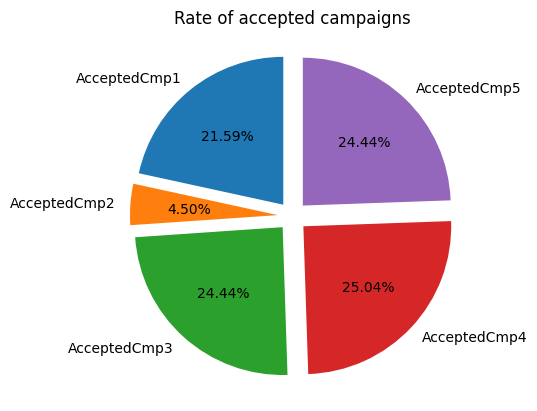

In [216]:
plt.pie(campaign_counts[1], labels = campaign_counts.index, autopct = '%1.2f%%', startangle = 90, explode = [0.1]*5)
plt.title("Rate of accepted campaigns")
plt.show()

#### Observations:
- The highest number of customers accepted the last campaign.
- Only a few customers accepted campaign 2.

In [217]:
df['Accepted_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] 
accepted = df['Accepted_campaign'].value_counts()

fig = px.pie(accepted, values = accepted.values, names = accepted.index, title = 'Distribution of Customers by Number of Accepted Campaigns')
fig.update_layout(width=700, height=500)
fig.show()

#### Observations:
- The majority of customers did not accept any campaigns.
- As the number of accepted campaigns increases, the number of customers decreases.

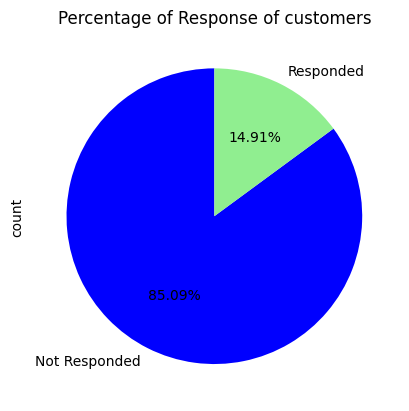

In [218]:
df['Response'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', labels = ['Not Responded','Responded'], startangle = 90, colors = ['blue', 'lightgreen'])
plt.title('Percentage of Response of customers')
plt.show()

#### Observations:
- Maximum customers are not responded.

## Place of Product Purchase

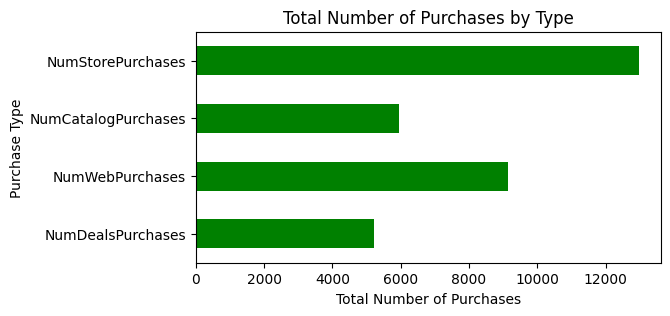

In [219]:
plt.figure(figsize = (6,3))
df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().plot(kind = 'barh', color = 'green')
plt.title("Total Number of Purchases by Type")
plt.xlabel("Total Number of Purchases")
plt.ylabel("Purchase Type")
plt.show()

#### Observations:
- The maximum number of purchases are made in-store, followed by web applications as the second highest source of purchases.
- This suggests that customers prefer to see products in person before making a purchase, indicating that most purchases are still happening offline.

In [220]:
df['Number_of_purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

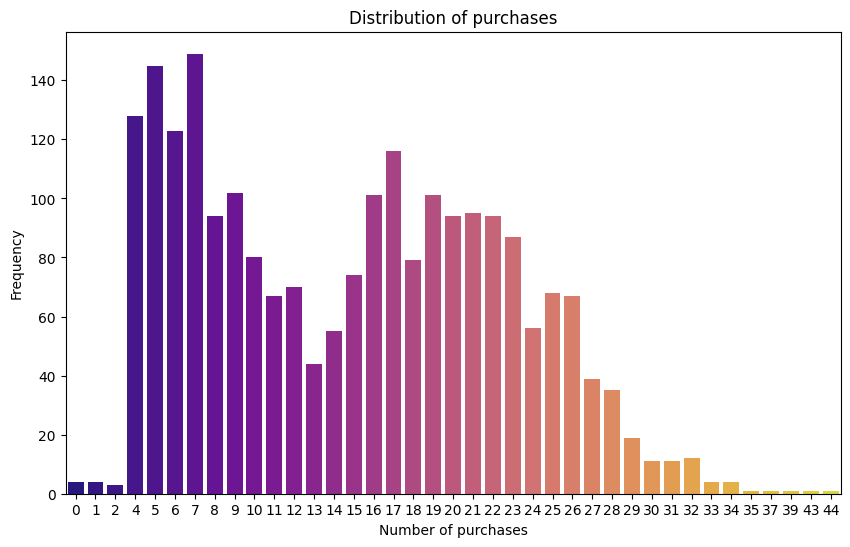

In [221]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Number_of_purchases', palette = "plasma")
plt.title('Distribution of purchases')
plt.xlabel('Number of purchases')
plt.ylabel('Frequency')
plt.show()

#### Observations:
- The highest frequency is for customers making 4 to 7 purchases.
- Purchases above 30 are significantly less frequent and appear as outliers.
- After 10 purchases, there is a gradual decline in frequency, with fewer customers making higher numbers of purchases.

## Web visits Last Month

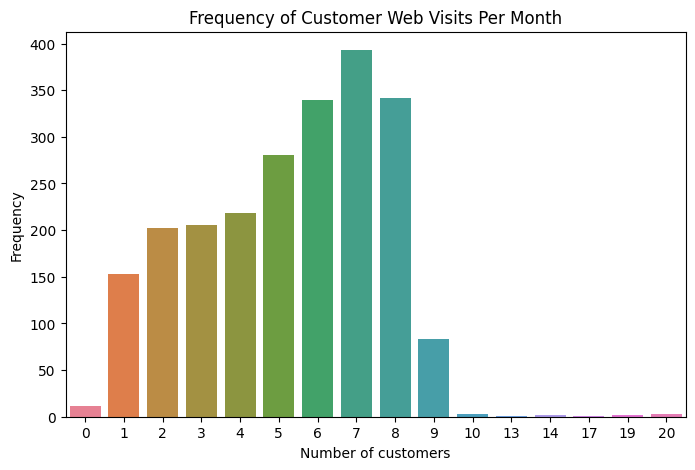

In [222]:
plt.figure(figsize =  (8,5))
sns.countplot(x = 'NumWebVisitsMonth', data = df, palette = 'husl')
plt.title('Frequency of Customer Web Visits Per Month')
plt.xlabel('Number of customers')
plt.ylabel('Frequency')
plt.show()

#### Observations:
- Most customers visited the website a maximum of 7 times in the last month.
- Only a few customers visited the website more than 9 times.

## Multi-variate

### Total amount spent vs income

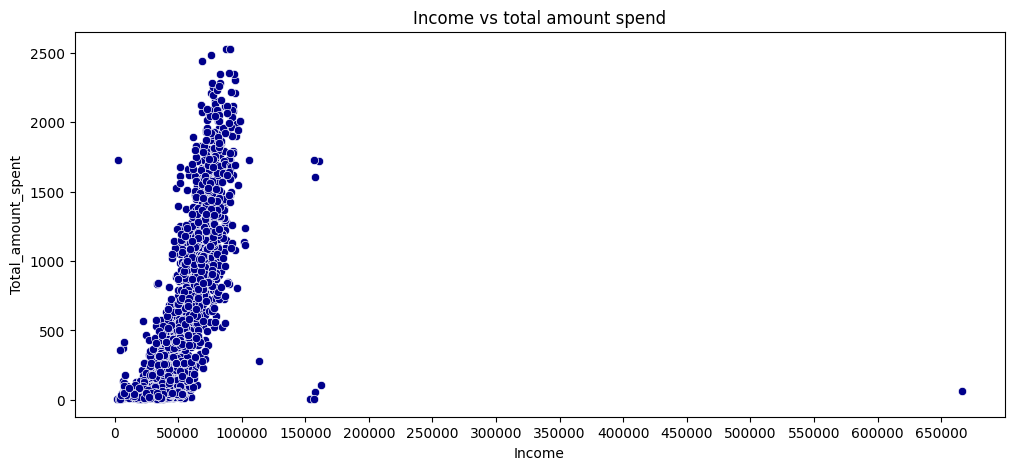

In [280]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = 'Income', y = 'Total_amount_spent', data = df, color = 'darkblue')
plt.title('Income vs total amount spend')
x_ticks = [i for i in range(0, 700000, 50000)]
plt.xticks(x_ticks)
plt.show()

#### Observation:
- Most customers have an income ranging from 0 to 100,000, with their total spending between 0 and 2,500.

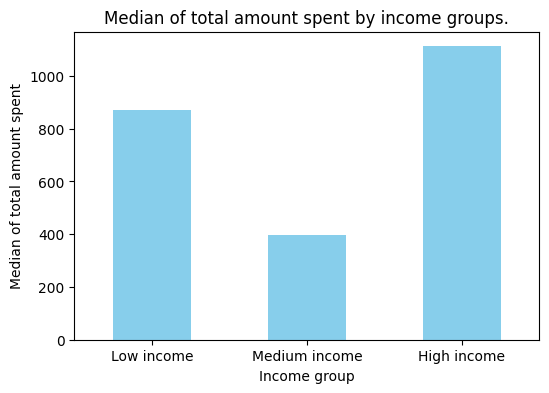

In [224]:
plt.figure(figsize = (6,4))
df.groupby(['Income_group'])['Total_amount_spent'].median().plot(kind = 'bar', color = 'skyblue')
plt.xlabel('Income group')
plt.ylabel('Median of total amount spent')
plt.title('Median of total amount spent by income groups.')
plt.xticks(rotation = 360)
plt.show()

#### Observations:
- The median total spending of low-income customers is higher than that of medium-income customers.
- Medium-income customers have the lowest median spending.
- High-income customers have the highest total spending overall. 

### Total amount spent by age distribution

In [225]:
amount_spent_by_age = df.groupby(['Age_group'])['Total_amount_spent'].agg(['size','mean'])

In [226]:
# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Pie chart for total number of customers
fig.add_trace(go.Pie(labels=amount_spent_by_age.index, values=amount_spent_by_age['size'], name="Total Customers",
                     title = 'Percentage distribution of customers by age group',titlefont=dict(size=16)), row=1, col=1)

# Pie chart for average amount spent of customers
fig.add_trace(go.Pie(labels=amount_spent_by_age.index, values=amount_spent_by_age['mean'], name="Average Spend",
                     title = 'Average amount spent', titlefont=dict(size=16)), row=1, col=2)

fig.update_layout(width = 1050, height = 500)
fig.show()

#### Observations:
- The total number of middle-aged adult customers is higher, but their average amount spend is low.
- The total number of senior customers is lower, but their average amount spend is higher.
- Middle-aged adults spend the least.

### Total amount spent by distribution of marital status

In [227]:
amount_spent_marital_status = df.groupby(['Marital_Status'])['Total_amount_spent'].agg(['size','mean'])

In [228]:
# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Pie chart for total number of customers
fig.add_trace(go.Pie(labels=amount_spent_marital_status.index, values=amount_spent_marital_status['size'], name="Total Customers",
                     title = 'Percentage distribution of customers by marital status', titlefont=dict(size=16)), row=1, col=1)

# Pie chart for average amount spent of customers
fig.add_trace(go.Pie(labels=amount_spent_marital_status.index, values=amount_spent_marital_status['mean'], name="Average Spend",
                     title = 'Avearge amount spent', titlefont=dict(size=16)), row=1, col=2)

fig.update_layout(width = 1050, height = 500)
fig.show()

#### Observations:
- Married and together customers are more numerous in the dataset, but their average spending is relatively low.
- Two customers have unusually high total spending compared to the rest.
- The average spending for divorced, single, and together customers is similar, but 'together' customers are more common in the data.

### Total amount spent by education level

In [229]:
amount_spent_of_education = df.groupby(['New_Education'])['Total_amount_spent'].agg(['size','mean'])

In [230]:
# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Pie chart for total number of customers
fig.add_trace(go.Pie(labels=amount_spent_of_education.index, values=amount_spent_of_education['size'], name="Total Customers",
                     title = 'Percentage distribution of customers by Education level', titlefont=dict(size=16)), row=1, col=1)

# Pie chart for average amount spent of customers
fig.add_trace(go.Pie(labels=amount_spent_of_education.index, values=amount_spent_of_education['mean'], name="Average Spend",
                     title = 'Avearge amount spent', titlefont=dict(size=16)), row=1, col=2)

fig.update_layout(width = 1050, height = 500)
fig.show()

#### Observations:
- The average amount spent is similar across all education levels.
- Graduates make up 50% of the dataset.

### Total amount spent by number of Kids

In [231]:
child_count = df.groupby(['Kids'])['Total_amount_spent'].agg(['size','mean'])

In [232]:
# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Pie chart for total number of customers
fig.add_trace(go.Pie(labels=child_count.index, values=child_count['size'], name="Total Customers",
                     title = 'Percentage distribution of customers by number of Kids', titlefont=dict(size=16)), row=1, col=1)

# Pie chart for average amount spent of customers
fig.add_trace(go.Pie(labels=child_count.index, values=child_count['mean'], name="Average Spend",
                     title = 'Avearge amount spent', titlefont=dict(size=16)), row=1, col=2)
fig.update_layout(width = 1050, height = 500)
fig.show()

#### Observations:
- Customers without Kids tend to have a higher average amount spent.
- Conversely, an increase in the number of Kids is associated with a lower total amount spent.

## Total amount spent vs customers days with the company

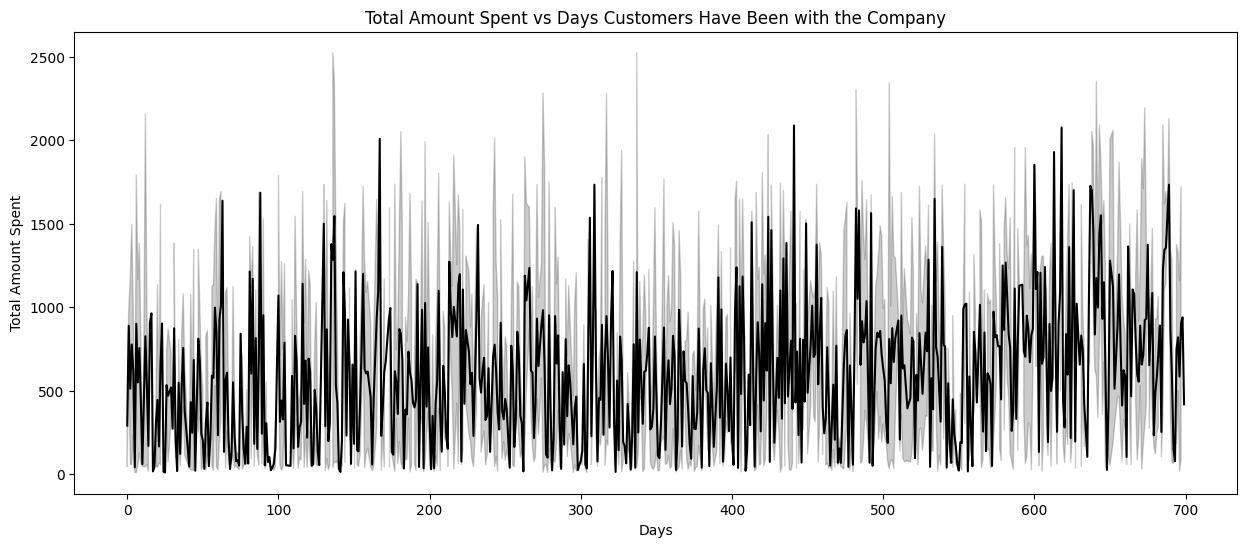

In [281]:
plt.figure(figsize = (15,6))
sns.lineplot(data=df, x='Days_for', y='Total_amount_spent', color = 'black')

plt.xlabel('Days')
plt.ylabel('Total Amount Spent')
plt.title("Total Amount Spent vs Days Customers Have Been with the Company")

plt.show()

#### Observation:
- There is no much relation between total amount spent vs days customers have been with the company.

## Total amount spent in each purchase frequency

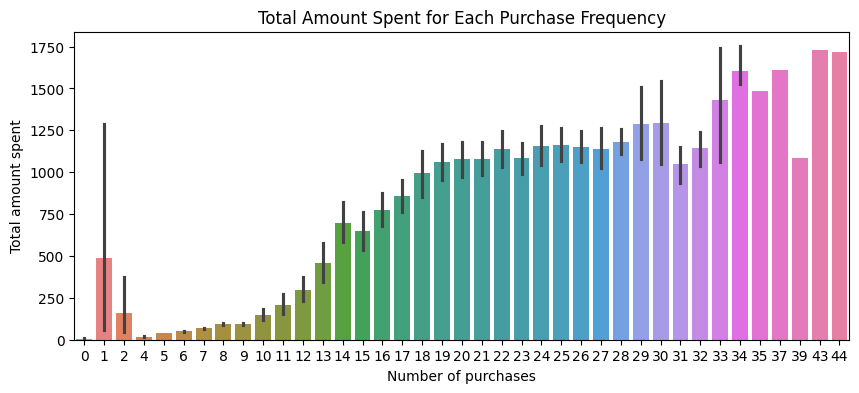

In [282]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'Number_of_purchases', y = 'Total_amount_spent', data = df, palette = 'husl')
plt.xlabel('Number of purchases')
plt.ylabel('Total amount spent')
plt.title('Total Amount Spent for Each Purchase Frequency')
plt.show()

#### Observations:
- Higher total amount spent corresponds to an increase in the number of purchases.
- A slight decrease in the number of purchases is observed at 31 and 39, while purchases at 1 show a notable increase.

## Number of purchases from different places by customers income

In [233]:
# customers by income vs different place of purchases

purchases_by_income = df.groupby(['Income_group'])[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()
purchases_by_income = purchases_by_income.set_index('Income_group').T

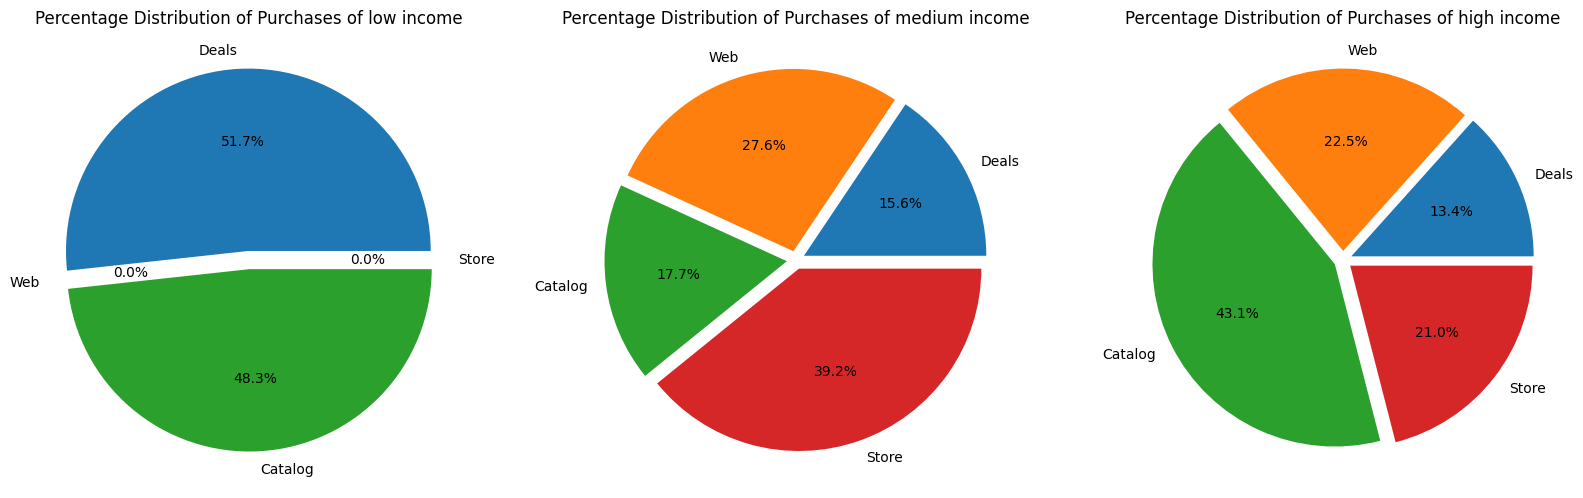

In [234]:
plt.figure(figsize = (20,10))

labels = ['Deals', 'Web', 'Catalog', 'Store']

plt.subplot(1,3,1)
plt.pie(x = purchases_by_income['Low income'].values, labels = labels,explode = [0.05]*4, autopct = '%1.1f%%')
plt.title("Percentage Distribution of Purchases of low income")

plt.subplot(1,3,2)
plt.pie(x = purchases_by_income['Medium income'].values, labels = labels,explode = [0.05]*4, autopct = '%1.1f%%')
plt.title("Percentage Distribution of Purchases of medium income")

plt.subplot(1,3,3)
plt.pie(x = purchases_by_income['High income'].values, labels = labels,explode = [0.05]*4, autopct = '%1.1f%%')
plt.title("Percentage Distribution of Purchases of high income")

plt.show()

#### Observations:
- Low-income customers make the most purchases through deals, while they don’t buy any products from the web or store.
- Medium-income customers make the most purchases from stores, with the fewest purchases coming from catalogs.
- High-income customers make the most purchases from catalogs, with the fewest purchases from deals.

## Customers spent amount in different types of products by their income

In [237]:
spent_by_income = df.groupby(['Income_group'])[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().reset_index().set_index("Income_group").T

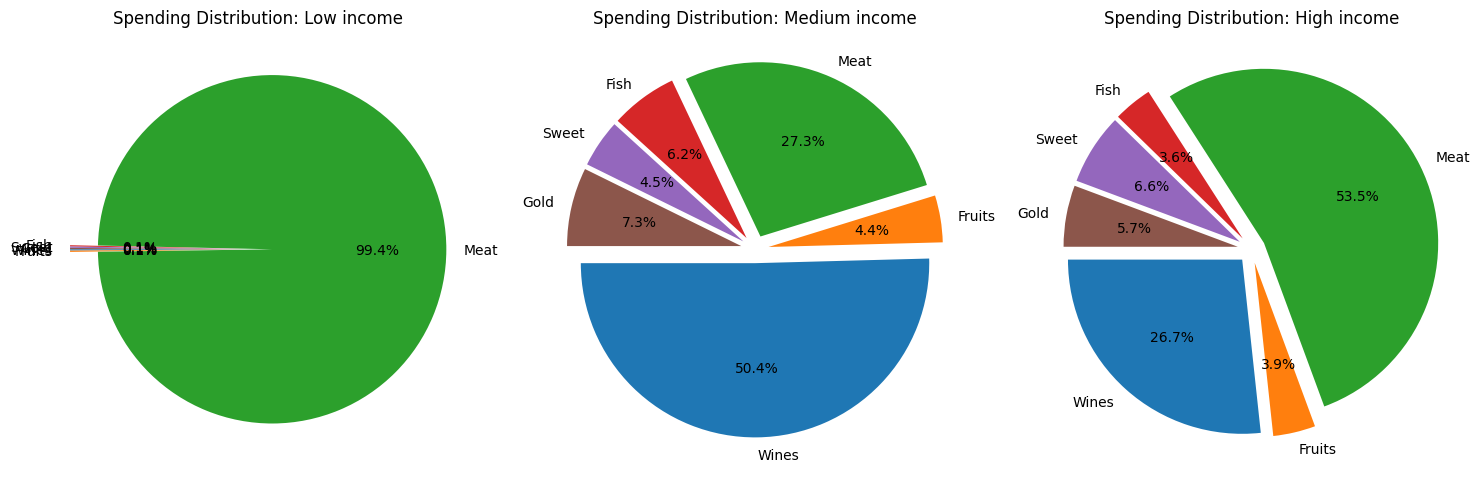

In [238]:
labels = ['Wines', 'Fruits', 'Meat', 'Fish','Sweet','Gold']

# Set up a 2x4 grid for the 8 marital statuses
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

# Loop through each marital status and plot a pie chart
for i, income in enumerate(spent_by_income.columns):
    ax = axes[i % 3]
    # Plot the pie chart for the current marital status
    ax.pie(
        x=spent_by_income[income].values,
        labels=labels,
        explode=[0.08] * len(labels),  # Add explosion effect to all slices
        autopct='%1.1f%%',
        startangle = 180
    )

    # Set the title for each subplot
    ax.set_title(f"Spending Distribution: {income}")

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Observations:
- Low-income customers spent 99.4% of their total spending on meat.
- High-income customers allocated the largest portion of their spending to meat.
- Medium-income customers spent 50% of their total spending on wines.

In [239]:
low_income = df[df['Income_group'] == 'Low income']

low_income[['MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds
21,1,1,1,1,1
1245,1,1,1,1,1


#### Observations:
- Low-income customers spent the same amount (1 unit) on wines, fruits, sweets, and gold products.

## Revenue generated from accepted campaign

In [242]:
result = pd.DataFrame()

for col in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    result[col] = df[df[col] == 1][['Total_amount_spent']].sum()


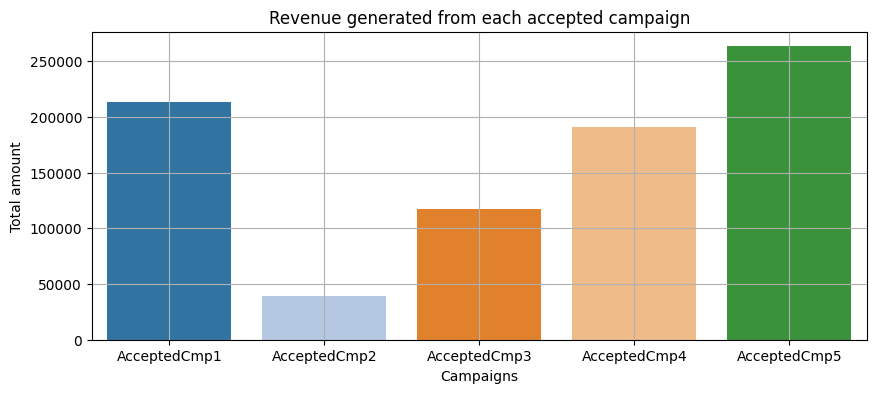

In [243]:
plt.figure(figsize = (10,4))
sns.barplot(result, palette = 'tab20')
plt.xlabel('Campaigns')
plt.ylabel('Total amount')
plt.title('Revenue generated from each accepted campaign')
plt.grid()
plt.show()

#### Observations:
- AcceptedCmp5 generated the highest revenue which is above 25,000, making it the most successful campaign.
- AcceptedCmp2 had the lowest contribution which is below 5000, indicating poor performance.
- Other campaigns, especially AcceptedCmp4 and AcceptedCmp1, showed moderate success.

### Number of purchases from each accepted campaign

In [244]:
result = pd.DataFrame()

for col in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    result[col] = df[df[col] == 1][['Number_of_purchases']].sum()


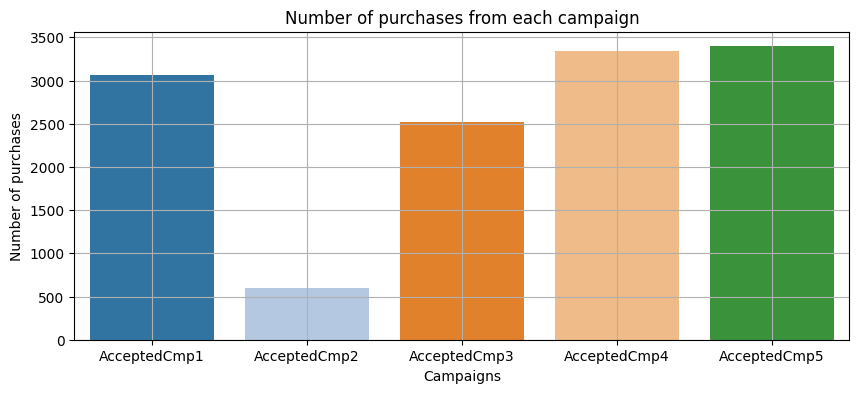

In [256]:
plt.figure(figsize = (10,4))
sns.barplot(result, palette = 'tab20')
plt.xlabel('Campaigns')
plt.ylabel('Number of purchases')
plt.title('Number of purchases from each campaign')
plt.grid()
plt.show()

#### Observations:
- The number of purchases from Campaigns 4 and 5 is almost the same.
- The highest number of purchases is from Campaign 5, while the lowest purchases, around 500, are from Campaign 2.
- Campaigns 1, 4, and 5 have more than 3000 purchases each.

## Customer who complained

In [246]:
complained_customer = df[df['Complain'] == 1]
complained_customer.shape[0]

21

#### Observations:
- 21 customers have complains. 

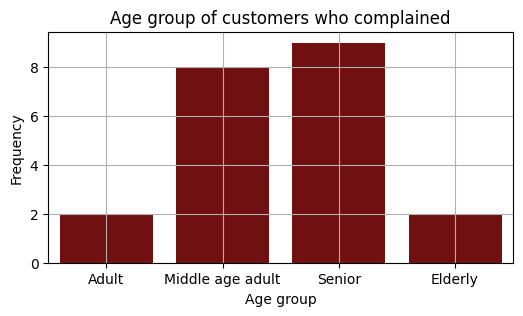

In [247]:
plt.figure(figsize = (6,3))
sns.countplot( x = 'Age_group', data = complained_customer, color = 'maroon')
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.title('Age group of customers who complained')
plt.grid()
plt.show()

#### Observations:
- More than 8 customers from seniors complained 

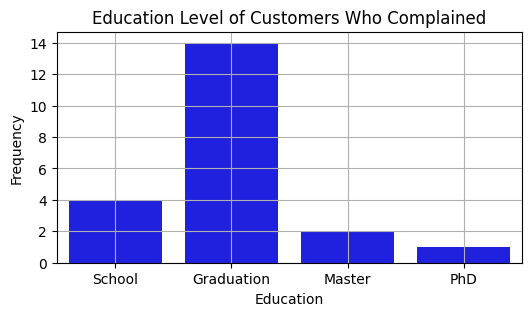

In [248]:
plt.figure(figsize = (6,3))
sns.countplot( x = 'New_Education', data = complained_customer, color = 'blue')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Education Level of Customers Who Complained')
plt.grid()
plt.show()

#### observations:
- 14 customers who complained are educated, which is the maximum.
- Among them, 4 customers have schooling education, 2 have a master's degree, and 1 has a PhD.

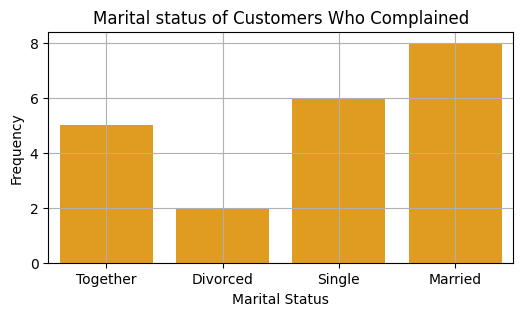

In [249]:
plt.figure(figsize = (6,3))
sns.countplot( x = 'Marital_Status', data = complained_customer, color = 'Orange')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Marital status of Customers Who Complained')
plt.grid()
plt.show()

#### Observation:
- 8 married customers have lodged complaints.

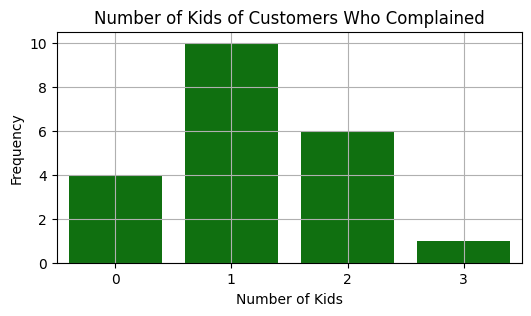

In [250]:
plt.figure(figsize = (6,3))
sns.countplot( x = 'Kids', data = complained_customer, color = 'green')
plt.xlabel('Number of Kids')
plt.ylabel('Frequency')
plt.title('Number of Kids of Customers Who Complained')
plt.grid()
plt.show()

#### Observations:
- The maximum complaints are from customers who have 1 child, with a total of 10 customers.
- There are 4 customers with no Kids, 6 customers with 2 Kids, and 1 customer with 3 Kids who have complaints.

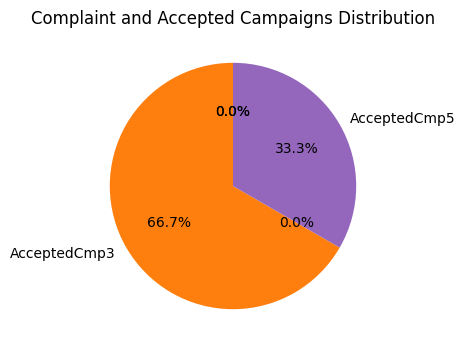

In [252]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
accepted_campaigns = complained_customer[campaign_columns].sum()

# Plot pie chart
plt.figure(figsize=(8,4))
accepted_campaigns.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd'])
plt.title('Complaint and Accepted Campaigns Distribution')
plt.show()

#### Observations:
- None of customers accepted campaign 1,2 and 4.
- 33.3% customers accepted campaign 3 and 66.7% customers accepted campaign 3.

In [294]:
Final_df = df[['Age','Education','Marital_Status','Kids','Income','Total_amount_spent','Accepted_campaign', 'Number_of_purchases']]

In [295]:
Final_df.head()

,Age,Education,Marital_Status,Kids,Income,Total_amount_spent,Accepted_campaign,Number_of_purchases
0,68,Graduation,Single,0,58138.0,1617,0,25
1,71,Graduation,Single,2,46344.0,27,0,6
2,60,Graduation,Together,0,71613.0,776,0,21
3,41,Graduation,Together,1,26646.0,53,0,8
4,44,PhD,Married,1,58293.0,422,0,19


In [296]:
import sklearn
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'sklearn'